### Dataset elegido: Medical Insurance Costs
En el sector de la salud, las aseguradoras necesitan predecir el costo que tendra asegurar a una persona. El costo del seguro depende de varios factores como la edad, el indice de masa corporal(IMC), el tabaquismo, entre otros.

### Importar dependencias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Cargar el dataest

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Variables predictoras y variable objetivo

In [3]:
X = df.drop("charges", axis=1)
y = df["charges"]

### Preprocesamiento de variables categoricas

In [5]:
categorical_cols = ['sex', 'smoker', 'region']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

### Crear pipeline con regresion lineal

In [6]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

### Dividir en entrenamiento y prueba

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento del modelo

In [20]:
model.fit(X_train, y_train);

### Realizar predicciones

In [25]:
resultado = model.predict(X_test)
print("Valores de costo del seguro predicho para las primeras 3 personas: ",resultado[:3])

Valores de costo del seguro predicho para las primeras 3 personas:  [ 8969.55027444  7068.74744287 36858.41091155]


### Grafico

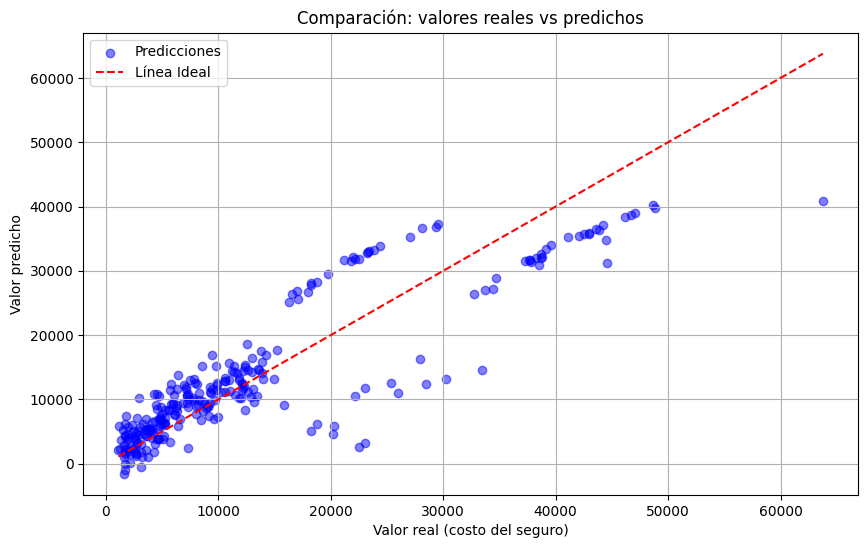

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, resultado, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Línea Ideal')
plt.xlabel('Valor real (costo del seguro)')
plt.ylabel('Valor predicho')
plt.title('Comparación: valores reales vs predichos')
plt.legend()
plt.grid(True)
plt.show()
